In [1]:
import pandas as pd
import os
import re

pd.options.display.max_columns = 100

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
DIR = "drive/MyDrive/Implementation/Attention/"
# TRAIN_SOURCE = os.path.join(DIR, "Train.json")
dataset = os.path.join(DIR, "ChatbotData.csv")

In [4]:
# with open(TRAIN_SOURCE) as f:
#     TRAIN_DATA = json.loads(f.read())
data = pd.read_csv(dataset, encoding='utf-8')
print(len(data))

11823


In [5]:
data

,Q,A,label
0,12시 땡!,하루가 또 가네요.,0
1,1지망 학교 떨어졌어,위로해 드립니다.,0
2,3박4일 놀러가고 싶다,여행은 언제나 좋죠.,0
3,3박4일 정도 놀러가고 싶다,여행은 언제나 좋죠.,0
4,PPL 심하네,눈살이 찌푸려지죠.,0
...,...,...,...
11818,훔쳐보는 것도 눈치 보임.,티가 나니까 눈치가 보이는 거죠!,2
11819,훔쳐보는 것도 눈치 보임.,훔쳐보는 거 티나나봐요.,2
11820,흑기사 해주는 짝남.,설렜겠어요.,2
11821,힘든 연애 좋은 연애라는게 무슨 차이일까?,잘 헤어질 수 있는 사이 여부인 거 같아요.,2


In [ ]:
sentences = list(data['Q'])+list(data['A'])

tokenized_sentences = [s.split() for s in sentences]
sent_len_by_token = [len(t) for t in tokenized_sentences]
sent_len_by_eumjeol = [len(s.replace(' ','')) for s in sentences]

In [ ]:
# train = pd.DataFrame(columns=['context', 'summary'])
# uid = 0
# for data in TRAIN_DATA:
#     context = data['Meta(Refine)']['passage']
#     context = context.replace('\n','')
#     train.loc[uid, 'context'] = " ".join(re.compile('[가-힣0-9]+').findall(context[:]))
#     train.loc[uid, 'summary'] = " ".join(re.compile('[가-힣0-9]+').findall(data['Annotation']['summary3']))
#     uid += 1

# test = pd.DataFrame(columns=['context','summary'])
# uid = 0
# for data in TEST_DATA:
#     for agenda in data['context'].keys():
#         context = ''
#         for line in data['context'][agenda]:
#             context += data['context'][agenda][line]
#             context += ' '
#         test.loc[uid, 'context'] = " ".join(re.compile('[가-힣0-9]+').findall(context[:-1]))
#         test.loc[uid, 'summary'] = " ".join(re.compile('[가-힣0-9]+').findall(data['label'][agenda]['summary']))
#         uid += 1

In [ ]:
%%bash
apt-get update
apt-get install g++ openjdk-8-jdk python-dev python3-dev
pip3 install JPype1
pip3 install konlpy

Hit:1 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:3 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:4 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hit:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Get:6 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease [1,581 B]
Hit:9 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:12 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:13 http://archive.ubuntu.co

In [ ]:
%env JAVA_HOME "/usr/lib/jvm/java-8-openjdk-amd64"

env: JAVA_HOME="/usr/lib/jvm/java-8-openjdk-amd64"


In [ ]:
%%bash
bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)
pip3 install /tmp/mecab-python-0.996

Installing automake (A dependency for mecab-ko)
Hit:1 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:2 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:3 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:4 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Hit:5 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:6 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Ign:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:9 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:12 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Reading package lists...
Reading 

debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 5.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 1381k  100 1381k    0     0  4831k      0 --:--:-- --:--:-- --:--:-- 4831k
./configure: line 7378: /usr/bin/file: No such file or directory
In file included from viterbi.cpp:14:0:
param.h:30:13: warning: 'Target {anonymous}::lexical_cast(Source) [with Target = std::__cxx11::basic_string<char>; Source = std::_

In [ ]:
# 토큰화
# 속도는 Mecab
# 일반적으로 현업에서는 명사 부사 동사 정도만 분석
# 분석이 정교해지면 기하급수적으로 늘음
# 정규화기능 okt 사용

import konlpy
from konlpy.tag import Okt # Mecab
okt = Okt()
# mecab = Mecab()

# def tokenizer(sentence):
#   return okt.morphs(sentence)

In [ ]:
morph_tokenized_sentences = [okt.morphs(s.replace(' ','')) for s in sentences]
sent_len_by_morph = [len(t) for  t in morph_tokenized_sentences]

Text(0, 0.5, 'Number of Sentences')

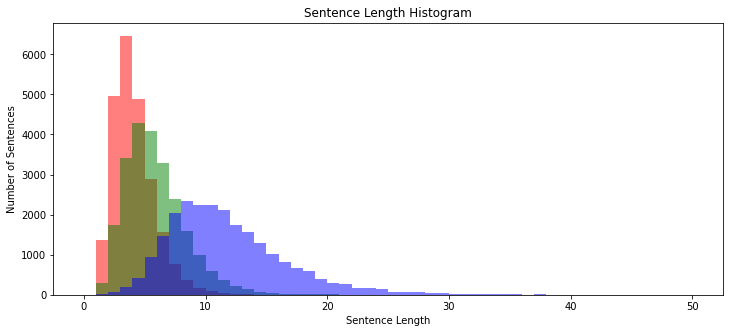

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.hist(sent_len_by_token, bins = 50, range = [0,50], color='r', alpha=0.5, label='어절')
plt.hist(sent_len_by_morph, bins = 50, range = [0,50], color='g', alpha=0.5, label='형태소')
plt.hist(sent_len_by_eumjeol, bins = 50, range = [0,50], color='b', alpha=0.5, label='음절')
# plt.yscale('log') # log scale
plt.title('Sentence Length Histogram')
plt.xlabel('Sentence Length')
plt.ylabel('Number of Sentences')

In [ ]:
# train['context_token'] = train['context'].apply(tokenizer)
# train['summary_token'] = train['summary'].apply(tokenizer)
# train.to_csv(DIR+'train.csv', index=False)

In [ ]:
import numpy as np
print('형태소 최대 길이 : {}'.format(np.max(sent_len_by_morph)))
print('형태소 최소 길이 : {}'.format(np.min(sent_len_by_morph)))
print('형태소 평균 길이 : {:.2f}'.format(np.mean(sent_len_by_morph)))
print('형태소 길이 표준편차 : {:.2f}'.format(np.std(sent_len_by_morph)))
print('형태소 중간 길이 : {}'.format(np.median(sent_len_by_morph)))
print('제1사분위 길이 : {}'.format(np.percentile(sent_len_by_morph,25)))
print('제3사분위 길이 : {}'.format(np.percentile(sent_len_by_morph,75)))

형태소 최대 길이 : 31
형태소 최소 길이 : 1
형태소 평균 길이 : 5.41
형태소 길이 표준편차 : 2.56
형태소 중간 길이 : 5.0
제1사분위 길이 : 4.0
제3사분위 길이 : 7.0


{'boxes': [<matplotlib.lines.Line2D at 0x7f1c2b11c450>,
 'caps': [<matplotlib.lines.Line2D at 0x7f1c2b0eef90>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f1c2b16b810>,
 'means': [<matplotlib.lines.Line2D at 0x7f1c2b16ba90>,
 'medians': [<matplotlib.lines.Line2D at 0x7f1c2b0eedd0>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f1c2b11cad0>,
  <matplotlib.lines.Line2D at 0x7f1c2b195d50>]}

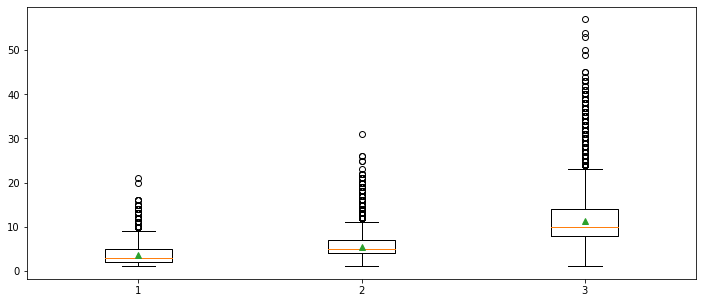

In [ ]:
# 박스 플롯
plt.figure(figsize=(12,5))
plt.boxplot([sent_len_by_token, sent_len_by_morph, sent_len_by_eumjeol], showmeans=True) # labels=['어절', '형태소', '음절']

In [ ]:
# 질문 답변 각각에 대한 문장 길이 분포 분석
query_sentences = list(data.Q)
answer_sentences= list(data.A)

query_morph_tokenized_sentences = [okt.morphs(s.replace(' ','')) for s in query_sentences]
query_sent_len_by_morph = [len(t) for t in query_morph_tokenized_sentences]

answer_morph_tokenized_sentences = [okt.morphs(s.replace(' ','')) for s in answer_sentences]
answer_sent_len_by_morph = [len(t) for t in answer_morph_tokenized_sentences]

Text(0, 0.5, 'Number of Queries')

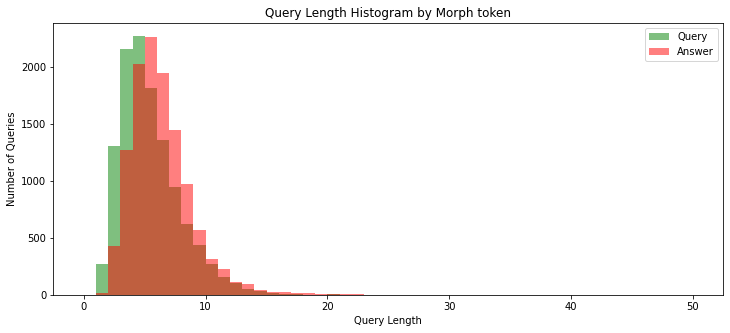

In [ ]:
plt.figure(figsize=(12,5))
plt.hist(query_sent_len_by_morph, bins = 50, range = [0,50], color='g', alpha=0.5, label='Query')
plt.hist(answer_sent_len_by_morph, bins = 50, range = [0,50], color='r', alpha=0.5, label='Answer')
# plt.yscale('log', nonposy='clip') # log scale
plt.legend()
plt.title('Query Length Histogram by Morph token')
plt.xlabel('Query Length')
plt.ylabel('Number of Queries')

{'boxes': [<matplotlib.lines.Line2D at 0x7f1c281e5150>,
 'caps': [<matplotlib.lines.Line2D at 0x7f1c2816d1d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f1c28174210>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f1c2816dc90>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f1c281e5710>,
  <matplotlib.lines.Line2D at 0x7f1c2817a210>]}

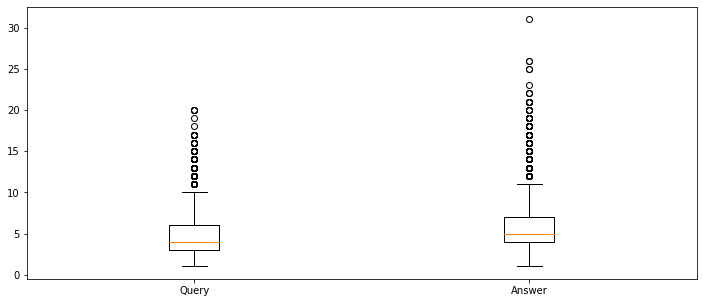

In [ ]:
# 박스 플롯
plt.figure(figsize=(12,5))
plt.boxplot([query_sent_len_by_morph, answer_sent_len_by_morph], labels=['Query','Answer'])